## Credit card data analysis - Czech Bank 1999

@uthor - Atin Maiti lastest edit on 2/10/2019 1:11 PM EST

Link to the data set:- https://www.researchgate.net/post/Is_there_any_public_database_for_financial_transactions_or_at_least_a_synthetic_generated_data_set

In [43]:
# The database schema

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data_map.gif")

###### All basic package import statements

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5]

import warnings 
warnings.filterwarnings('ignore')

from sklearn import tree
DTclf = tree.DecisionTreeClassifier()

###### All data read statements

In [45]:
account = pd.read_csv('account.csv')

In [46]:
account.head(2)

,account_id,district_id,statement,dateopening
0,576,55,monthly,1993-01-01
1,3818,74,monthly,1993-01-01


In [47]:
# Calulating the age of the account in years till 1999.
account['ageofaccount'] = 1999 - pd.to_numeric(account.dateopening.str.slice(0,4))

In [48]:
account.head(2)

,account_id,district_id,statement,dateopening,ageofaccount
0,576,55,monthly,1993-01-01,6
1,3818,74,monthly,1993-01-01,6


In [49]:
# Checking missing values
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
account_id      4500 non-null int64
district_id     4500 non-null int64
statement       4500 non-null object
dateopening     4500 non-null object
ageofaccount    4500 non-null int64
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


In [50]:
# Summary statistics of accounts
account.describe()

,account_id,district_id,ageofaccount
count,4500.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,3.901778
std,2313.811984,25.177217,1.483898
min,1.000000,1.000000,2.000000
25%,1182.750000,13.000000,3.000000
50%,2368.000000,38.000000,3.000000
75%,3552.250000,60.000000,6.000000
max,11382.000000,77.000000,6.000000


In [51]:
# This table maps the relationship between account credit card and client.
disposition = pd.read_csv('disp.csv')

In [52]:
disposition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
disp_id       5369 non-null int64
client_id     5369 non-null int64
account_id    5369 non-null int64
type          5369 non-null object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


In [53]:
client = pd.read_csv('client.csv')

In [54]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
client_id      5369 non-null int64
district_id    5369 non-null int64
sex            5369 non-null object
dob            5369 non-null object
dtypes: int64(2), object(2)
memory usage: 167.9+ KB


In [55]:
# Calculating the age of client uptill 1999
client['age'] = 1999 - pd.to_numeric(client.dob.str.slice(0,4))

In [56]:
client.head()

,client_id,district_id,sex,dob,age
0,1,18,F,1970-12-13,29
1,2,1,M,1945-02-04,54
2,3,1,F,1940-10-09,59
3,4,5,M,1956-12-01,43
4,5,5,F,1960-07-03,39


In [57]:
card = pd.read_csv('card.csv')

In [58]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
card_id    892 non-null int64
disp_id    892 non-null int64
type       892 non-null object
issued     892 non-null object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


In [59]:
district = pd.read_csv('district.csv')

In [60]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
a1     77 non-null int64
a2     77 non-null object
a3     77 non-null object
a4     77 non-null int64
a5     77 non-null int64
a6     77 non-null int64
a7     77 non-null int64
a8     77 non-null int64
a9     77 non-null int64
a10    77 non-null float64
a11    77 non-null int64
a12    76 non-null float64
a13    77 non-null float64
a14    77 non-null int64
a15    76 non-null float64
a16    77 non-null int64
dtypes: float64(4), int64(10), object(2)
memory usage: 9.7+ KB


In [61]:
# Changing the name of column to more descriptive ones.
district.columns = ['districtCode', 'districtName', 'region', 'noofinhabitant', 'a5', 'a6', 'a7', 'a8', 'noofcities', 'ratioofurbaninhabitants', 
                    'avgsalary','unemp95', 'unemp96', 'entrepreneurs', 'crimes95', 'crimes96']

In [62]:
order = pd.read_csv('order.csv')

In [63]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
order_id      6471 non-null int64
account_id    6471 non-null int64
bank_to       6471 non-null object
account_to    6471 non-null int64
amount        6471 non-null float64
k_symbol      6471 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 303.4+ KB


In [64]:
loan = pd.read_csv("loan.csv")

In [65]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
loan_id       682 non-null int64
account_id    682 non-null int64
date          682 non-null int64
amount        682 non-null int64
duration      682 non-null int64
payments      682 non-null float64
status        682 non-null object
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


In [66]:
transaction = pd.read_table('trans.asc', sep=';')

In [67]:
# Transaction table has many missing values, but as a preliminary analysis we will be just 
# using the freq transaction as our attribute
transaction.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


###### Merging Tables

In [68]:
# Outer join of Account on disposition table
join1  = pd.merge(account, disposition, on='account_id', how='outer')

In [69]:
join1.head()

,account_id,district_id,statement,dateopening,ageofaccount,disp_id,client_id,type
0,576,55,monthly,1993-01-01,6,692,692,OWNER
1,576,55,monthly,1993-01-01,6,693,693,DISPONENT
2,3818,74,monthly,1993-01-01,6,4601,4601,OWNER
3,3818,74,monthly,1993-01-01,6,4602,4602,DISPONENT
4,704,55,monthly,1993-01-01,6,844,844,OWNER


In [70]:
# Outer join on table join1 on client table
join2 = pd.merge(join1, client, on='client_id', how='outer')

In [71]:
join2.head()

,account_id,district_id_x,statement,dateopening,ageofaccount,disp_id,client_id,type,district_id_y,sex,dob,age
0,576,55,monthly,1993-01-01,6,692,692,OWNER,74,F,1936-01-11,63
1,576,55,monthly,1993-01-01,6,693,693,DISPONENT,74,M,1935-03-17,64
2,3818,74,monthly,1993-01-01,6,4601,4601,OWNER,1,M,1935-04-02,64
3,3818,74,monthly,1993-01-01,6,4602,4602,DISPONENT,1,F,1934-04-04,65
4,704,55,monthly,1993-01-01,6,844,844,OWNER,22,M,1945-01-14,54


###### district_id_x is account district
###### district_id_y is client disttrict

In [72]:
# Finally merging card details to join2 table
join3 = pd.merge(join2, card, on='disp_id', how='outer')

In [73]:
join3.columns

Index(['account_id', 'district_id_x', 'statement', 'dateopening',
       'ageofaccount', 'disp_id', 'client_id', 'type_x', 'district_id_y',
       'sex', 'dob', 'age', 'card_id', 'type_y', 'issued'],
      dtype='object')

In [74]:
# Changing district id col name to avoid confusion
join3.columns = ['account_id', 'district_id_account', 'statement', 'dateopening',
       'ageofaccount', 'disp_id', 'client_id', 'type_x', 'district_id_client',
       'sex', 'dob', 'age', 'card_id', 'type_y', 'issued']

In [75]:
join3.head()

,account_id,district_id_account,statement,dateopening,ageofaccount,disp_id,client_id,type_x,district_id_client,sex,dob,age,card_id,type_y,issued
0,576,55,monthly,1993-01-01,6,692,692,OWNER,74,F,1936-01-11,63,NaN,NaN,NaN
1,576,55,monthly,1993-01-01,6,693,693,DISPONENT,74,M,1935-03-17,64,NaN,NaN,NaN
2,3818,74,monthly,1993-01-01,6,4601,4601,OWNER,1,M,1935-04-02,64,NaN,NaN,NaN
3,3818,74,monthly,1993-01-01,6,4602,4602,DISPONENT,1,F,1934-04-04,65,NaN,NaN,NaN
4,704,55,monthly,1993-01-01,6,844,844,OWNER,22,M,1945-01-14,54,NaN,NaN,NaN


## Determining high risk clients

Assumption:  These are the client who had taken and failed to pay even after the contract expired.

In [76]:
# Loan with status 'B' stands for contract finished, loan not payed.
HighRiskAcc = loan[loan.status == 'B']

In [77]:
HighRiskAcc.account_id.unique() # These are the accounts associated with high rish clients

array([ 1787,  5428,  6034, 10266,  8073, 10131,  6473,  5927,  5442,
        6051,   790,  2176,  7824,  8566,  1106,  1527,  6118, 11021,
        1993,   347,  6609,  4081,  5066,  6400,  7418,    19,  4462,
        9199,  4320,  1888,  3273], dtype=int64)

In [78]:
highRiskacc = HighRiskAcc.account_id.unique() # High risk clients

In [79]:
len(highRiskacc)

31

In [80]:
HighRisk = join2[join2.account_id.isin(highRiskacc)]

In [81]:
HighRisk.client_id.unique()

array([ 7815,  7291,  6567,  2166,  6551,   946,  2635, 12625, 13548,
        7311,  1327,  9973, 10566,  1851,  7166, 12464,   424,  7390,
        9675,  2422,  7980,  9196,    25,  4918,  6115,  7727,  5384,
        3962, 11327,  5203,  2291], dtype=int64)

In [82]:
highRisk = HighRisk.client_id.unique()

In [83]:
len(highRisk)

31

Hypothesis: As the number of HR acc and HR clients are same we can infer that HR clients are more likely those client who own an account and does not have any disponent.

In [84]:
client.age.describe()

count    5369.000000
mean       45.801639
std        17.282283
min        12.000000
25%        31.000000
50%        45.000000
75%        59.000000
max        88.000000
Name: age, dtype: float64

In [85]:
clienthighRisk = client[client.client_id.isin(highRisk)]

In [86]:
clienthighRisk.age.describe()

count    31.000000
mean     43.967742
std      13.123729
min      21.000000
25%      34.000000
50%      47.000000
75%      53.500000
max      64.000000
Name: age, dtype: float64

Hypothesis: High risk clients are usually mid age people between the age of 20 - 60

In [87]:
clienthighRisk.district_id.unique()

array([21,  1, 54, 20, 31, 30,  6, 68, 67, 74, 11, 61, 73, 13, 24,  5, 15,
       77, 56,  4, 16, 60, 72, 39], dtype=int64)

All sorts of hypothesis can be made for HR clients with the existing data, let feed all the data into model and see the
model selection.

In [88]:
orderbySum = order.groupby('account_id')['amount'].sum()

In [89]:
orderbySum = pd.DataFrame(orderbySum)

In [90]:
orderbySum['account_id'] = orderbySum.index

### Demographics Vizualization

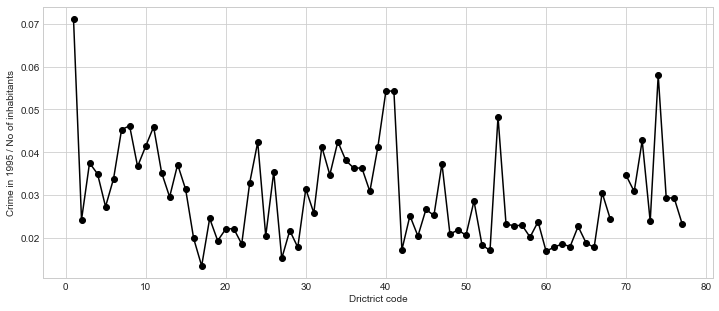

In [91]:
plt.plot(district.districtCode, district.crimes95/district.noofinhabitant, '-ok')
plt.ylabel('Crime in 1995 / No of inhabitants')
plt.xlabel( 'Drictrict code' )
plt.show()

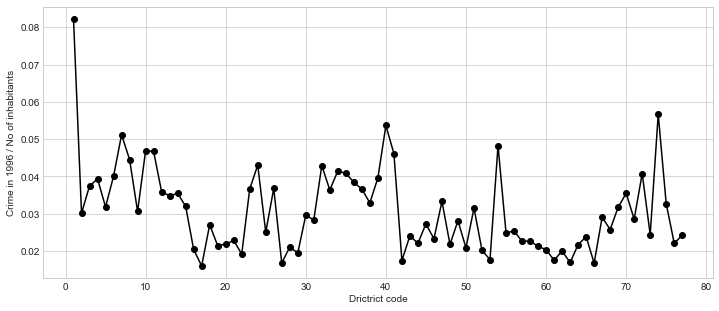

In [92]:
plt.plot(district.districtCode, district.crimes96/district.noofinhabitant, '-ok')
plt.ylabel('Crime in 1996 / No of inhabitants')
plt.xlabel( 'Drictrict code' )
plt.show()

In [93]:
# Districts with crime rate more than 5 %
district[(district.crimes96/district.noofinhabitant)>0.05]

,districtCode,districtName,region,noofinhabitant,a5,a6,a7,a8,noofcities,ratioofurbaninhabitants,avgsalary,unemp95,unemp96,entrepreneurs,crimes95,crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677.0,99107
6,7,Melnik,central Bohemia,94725,38,28,1,3,6,63.4,9920,2.26,2.87,130,4289.0,4846
39,40,Teplice,north Bohemia,128118,9,16,6,3,8,85.3,9317,6.49,7.07,97,6949.0,6872
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782.0,18347


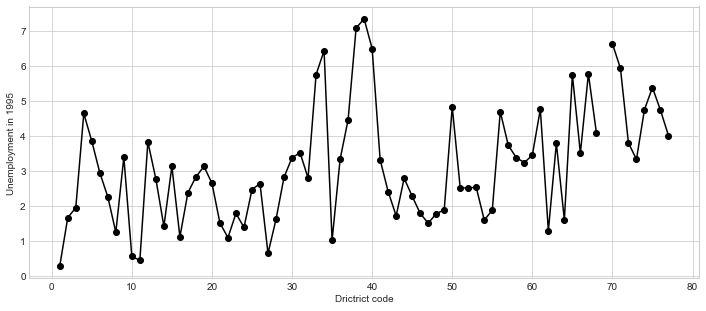

In [94]:
plt.plot(district.districtCode, district.unemp95, '-ok')
plt.ylabel('Unemployment in 1995')
plt.xlabel( 'Drictrict code' )
plt.show()

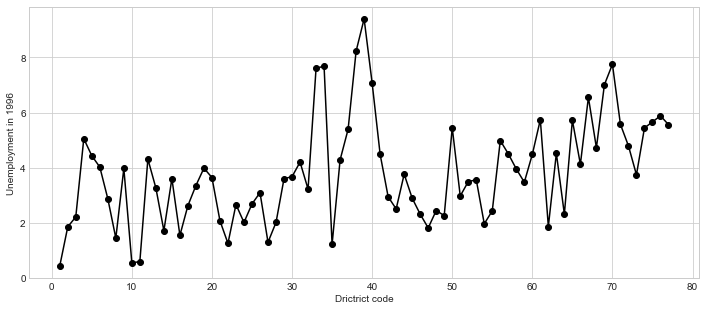

In [95]:
plt.plot(district.districtCode, district.unemp96, '-ok')
plt.ylabel('Unemployment in 1996')
plt.xlabel( 'Drictrict code' )
plt.show()

In [96]:
temp = district[district.unemp96 > 6]

In [97]:
# Districts with Umemp rate more than 6 in 1996
temp.districtCode.unique()

array([33, 34, 38, 39, 40, 67, 69, 70], dtype=int64)

 ## Flagging high risk clients 

###### The aim is to create a dataset with exsisting information and attributes from various tables to predict High Risk clients

The dataset I am trying to achieve for my data modelling, columns are as follows:-

'clientType' - Type of client

'districtCode' - District code of the account

'sex' - Sexual orientation of the client

'age'- Age of the client till 1999

'HighValueFlag' - Label - client possesing gold cards.

'frequncyoftrans' - Frequency of transaction done by client.

'avgsalary' - Average salary of that district.

'unemp95' - Unemploment rate in the district during 1995

'unemp96' - Unemploment rate in the district during 1996

'entrepreneurs' - No. of entrepreneurs per 1000 inhabitants in the district

'crimes95' - Crime rate in the district during 1995

'crimes96' - Crime rate in the district during 1995

'accSameDistrictflag' - Does the client live in the same district as the account flag

'directDebitAmount' - Direct order total made by the client

'loanAmount' - Loan amount if any

'loanDuration' - loan duration if any

'HighRiskFlag' - Label - client with loan status 'B'.

In [98]:
#calculate transaction frequecy
transfreq = transaction.groupby('account_id').count()

In [99]:
TransactionFreq = pd.DataFrame(transfreq['trans_id'],transfreq.index)

In [100]:
TransactionFreq['account_id'] = TransactionFreq.index

In [101]:
join_1 = pd.merge(join3, TransactionFreq, on='account_id', how='outer')

In [102]:
join_1.columns

Index(['account_id', 'district_id_account', 'statement', 'dateopening',
       'ageofaccount', 'disp_id', 'client_id', 'type_x', 'district_id_client',
       'sex', 'dob', 'age', 'card_id', 'type_y', 'issued', 'trans_id'],
      dtype='object')

In [103]:
join_1.columns =['account_id', 'districtCode', 'statement', 'dateopening',
       'ageofaccount', 'disp_id', 'client_id', 'type_x', 'district_id_client',
       'sex', 'dob', 'age', 'card_id', 'type_y', 'issued', 'frequncyoftrans']

In [104]:
join_2 = pd.merge(join_1, district, on = 'districtCode', how = 'outer')

In [105]:
join_2.head()

,account_id,districtCode,statement,dateopening,ageofaccount,disp_id,client_id,type_x,district_id_client,sex,...,a7,a8,noofcities,ratioofurbaninhabitants,avgsalary,unemp95,unemp96,entrepreneurs,crimes95,crimes96
0,576,55,monthly,1993-01-01,6,692,692,OWNER,74,F,...,18,0,9,33.9,8743,1.88,2.43,111,3659.0,3894
1,576,55,monthly,1993-01-01,6,693,693,DISPONENT,74,M,...,18,0,9,33.9,8743,1.88,2.43,111,3659.0,3894
2,704,55,monthly,1993-01-01,6,844,844,OWNER,22,M,...,18,0,9,33.9,8743,1.88,2.43,111,3659.0,3894
3,704,55,monthly,1993-01-01,6,845,845,DISPONENT,22,F,...,18,0,9,33.9,8743,1.88,2.43,111,3659.0,3894
4,192,55,monthly,1993-01-08,6,232,232,OWNER,55,F,...,18,0,9,33.9,8743,1.88,2.43,111,3659.0,3894


In [106]:
join_2['sameDistrict'] = join_2.district_id_client == join_2.districtCode

In [107]:
join_2.head()

,account_id,districtCode,statement,dateopening,ageofaccount,disp_id,client_id,type_x,district_id_client,sex,...,a8,noofcities,ratioofurbaninhabitants,avgsalary,unemp95,unemp96,entrepreneurs,crimes95,crimes96,sameDistrict
0,576,55,monthly,1993-01-01,6,692,692,OWNER,74,F,...,0,9,33.9,8743,1.88,2.43,111,3659.0,3894,False
1,576,55,monthly,1993-01-01,6,693,693,DISPONENT,74,M,...,0,9,33.9,8743,1.88,2.43,111,3659.0,3894,False
2,704,55,monthly,1993-01-01,6,844,844,OWNER,22,M,...,0,9,33.9,8743,1.88,2.43,111,3659.0,3894,False
3,704,55,monthly,1993-01-01,6,845,845,DISPONENT,22,F,...,0,9,33.9,8743,1.88,2.43,111,3659.0,3894,False
4,192,55,monthly,1993-01-08,6,232,232,OWNER,55,F,...,0,9,33.9,8743,1.88,2.43,111,3659.0,3894,True


In [108]:
join_3 = pd.merge(join_2, orderbySum, on = 'account_id', how = 'outer')

In [109]:
join_3.head()

,account_id,districtCode,statement,dateopening,ageofaccount,disp_id,client_id,type_x,district_id_client,sex,...,noofcities,ratioofurbaninhabitants,avgsalary,unemp95,unemp96,entrepreneurs,crimes95,crimes96,sameDistrict,amount
0,576,55,monthly,1993-01-01,6,692,692,OWNER,74,F,...,9,33.9,8743,1.88,2.43,111,3659.0,3894,False,3662.0
1,576,55,monthly,1993-01-01,6,693,693,DISPONENT,74,M,...,9,33.9,8743,1.88,2.43,111,3659.0,3894,False,3662.0
2,704,55,monthly,1993-01-01,6,844,844,OWNER,22,M,...,9,33.9,8743,1.88,2.43,111,3659.0,3894,False,3338.0
3,704,55,monthly,1993-01-01,6,845,845,DISPONENT,22,F,...,9,33.9,8743,1.88,2.43,111,3659.0,3894,False,3338.0
4,192,55,monthly,1993-01-08,6,232,232,OWNER,55,F,...,9,33.9,8743,1.88,2.43,111,3659.0,3894,True,3583.0


In [110]:
join_3.columns

Index(['account_id', 'districtCode', 'statement', 'dateopening',
       'ageofaccount', 'disp_id', 'client_id', 'type_x', 'district_id_client',
       'sex', 'dob', 'age', 'card_id', 'type_y', 'issued', 'frequncyoftrans',
       'districtName', 'region', 'noofinhabitant', 'a5', 'a6', 'a7', 'a8',
       'noofcities', 'ratioofurbaninhabitants', 'avgsalary', 'unemp95',
       'unemp96', 'entrepreneurs', 'crimes95', 'crimes96', 'sameDistrict',
       'amount'],
      dtype='object')

In [111]:
join_3_v1 = join_3.drop(['district_id_client', 'statement', 'dateopening','dob','card_id','issued', 'districtName', 'region',
       'noofinhabitant', 'a5', 'a6', 'a7', 'a8', 'noofcities','ratioofurbaninhabitants'], axis =1)

In [112]:
join_3_v1.head()

,account_id,districtCode,ageofaccount,disp_id,client_id,type_x,sex,age,type_y,frequncyoftrans,avgsalary,unemp95,unemp96,entrepreneurs,crimes95,crimes96,sameDistrict,amount
0,576,55,6,692,692,OWNER,F,63,NaN,358,8743,1.88,2.43,111,3659.0,3894,False,3662.0
1,576,55,6,693,693,DISPONENT,M,64,NaN,358,8743,1.88,2.43,111,3659.0,3894,False,3662.0
2,704,55,6,844,844,OWNER,M,54,NaN,479,8743,1.88,2.43,111,3659.0,3894,False,3338.0
3,704,55,6,845,845,DISPONENT,F,46,NaN,479,8743,1.88,2.43,111,3659.0,3894,False,3338.0
4,192,55,6,232,232,OWNER,F,78,NaN,349,8743,1.88,2.43,111,3659.0,3894,True,3583.0


In [113]:
join_3_v1.columns = ['account_id', 'districtCode', 'ageofaccount', 'disp_id', 'client_id',
       'clientType', 'sex', 'age', 'type_y', 'frequncyoftrans', 'avgsalary',
       'unemp95', 'unemp96', 'entrepreneurs', 'crimes95', 'crimes96',
       'sameDistrict', 'amount']

In [114]:
join_3_v1.fillna(0, inplace=True)

In [115]:
join_3_v1.head()

,account_id,districtCode,ageofaccount,disp_id,client_id,clientType,sex,age,type_y,frequncyoftrans,avgsalary,unemp95,unemp96,entrepreneurs,crimes95,crimes96,sameDistrict,amount
0,576,55,6,692,692,OWNER,F,63,0,358,8743,1.88,2.43,111,3659.0,3894,False,3662.0
1,576,55,6,693,693,DISPONENT,M,64,0,358,8743,1.88,2.43,111,3659.0,3894,False,3662.0
2,704,55,6,844,844,OWNER,M,54,0,479,8743,1.88,2.43,111,3659.0,3894,False,3338.0
3,704,55,6,845,845,DISPONENT,F,46,0,479,8743,1.88,2.43,111,3659.0,3894,False,3338.0
4,192,55,6,232,232,OWNER,F,78,0,349,8743,1.88,2.43,111,3659.0,3894,True,3583.0


In [116]:
join_4 = pd.merge(join_3_v1, loan, on = 'account_id', how = 'outer')

In [117]:
join_4.head()

,account_id,districtCode,ageofaccount,disp_id,client_id,clientType,sex,age,type_y,frequncyoftrans,...,crimes95,crimes96,sameDistrict,amount_x,loan_id,date,amount_y,duration,payments,status
0,576,55,6,692,692,OWNER,F,63,0,358,...,3659.0,3894,False,3662.0,NaN,NaN,NaN,NaN,NaN,NaN
1,576,55,6,693,693,DISPONENT,M,64,0,358,...,3659.0,3894,False,3662.0,NaN,NaN,NaN,NaN,NaN,NaN
2,704,55,6,844,844,OWNER,M,54,0,479,...,3659.0,3894,False,3338.0,NaN,NaN,NaN,NaN,NaN,NaN
3,704,55,6,845,845,DISPONENT,F,46,0,479,...,3659.0,3894,False,3338.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192,55,6,232,232,OWNER,F,78,0,349,...,3659.0,3894,True,3583.0,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [119]:
join_4_v1 = join_4.drop(['loan_id', 'date','payments'], axis = 1)

In [120]:
join_4_v1.head()

,account_id,districtCode,ageofaccount,disp_id,client_id,clientType,sex,age,type_y,frequncyoftrans,...,unemp95,unemp96,entrepreneurs,crimes95,crimes96,sameDistrict,amount_x,amount_y,duration,status
0,576,55,6,692,692,OWNER,F,63,0,358,...,1.88,2.43,111,3659.0,3894,False,3662.0,NaN,NaN,NaN
1,576,55,6,693,693,DISPONENT,M,64,0,358,...,1.88,2.43,111,3659.0,3894,False,3662.0,NaN,NaN,NaN
2,704,55,6,844,844,OWNER,M,54,0,479,...,1.88,2.43,111,3659.0,3894,False,3338.0,NaN,NaN,NaN
3,704,55,6,845,845,DISPONENT,F,46,0,479,...,1.88,2.43,111,3659.0,3894,False,3338.0,NaN,NaN,NaN
4,192,55,6,232,232,OWNER,F,78,0,349,...,1.88,2.43,111,3659.0,3894,True,3583.0,NaN,NaN,NaN


In [121]:
join_4_v1.fillna(0, inplace=True)

In [122]:
# Setting the label
join_4_v1.columns = ['account_id', 'districtCode', 'ageofaccount', 'disp_id', 'client_id',
       'clientType', 'sex', 'age', 'HighValueFlag', 'frequncyoftrans', 'avgsalary',
       'unemp95', 'unemp96', 'entrepreneurs', 'crimes95', 'crimes96',
       'accSameDistrictflag', 'directDebitAmount', 'loanAmount', 'loanDuration', 'HighRiskFlag']

In [123]:
join_4_v1.head()

,account_id,districtCode,ageofaccount,disp_id,client_id,clientType,sex,age,HighValueFlag,frequncyoftrans,...,unemp95,unemp96,entrepreneurs,crimes95,crimes96,accSameDistrictflag,directDebitAmount,loanAmount,loanDuration,HighRiskFlag
0,576,55,6,692,692,OWNER,F,63,0,358,...,1.88,2.43,111,3659.0,3894,False,3662.0,0.0,0.0,0
1,576,55,6,693,693,DISPONENT,M,64,0,358,...,1.88,2.43,111,3659.0,3894,False,3662.0,0.0,0.0,0
2,704,55,6,844,844,OWNER,M,54,0,479,...,1.88,2.43,111,3659.0,3894,False,3338.0,0.0,0.0,0
3,704,55,6,845,845,DISPONENT,F,46,0,479,...,1.88,2.43,111,3659.0,3894,False,3338.0,0.0,0.0,0
4,192,55,6,232,232,OWNER,F,78,0,349,...,1.88,2.43,111,3659.0,3894,True,3583.0,0.0,0.0,0


In [124]:
join_4_v1.HighRiskFlag = join_4_v1.HighRiskFlag.apply(lambda x: (x == 'B') , 1, 0)

In [125]:
join_4_v1.HighRiskFlag = join_4_v1.HighRiskFlag.astype('int64', copy = False)

In [126]:
join_4_v1.HighRiskFlag.unique()

array([0, 1], dtype=int64)

In [127]:
join_4_v1.HighValueFlag = join_4_v1.HighValueFlag.apply(lambda x: (x == 'gold') , 1 , 0)

In [128]:
join_4_v1.HighValueFlag = join_4_v1.HighValueFlag.astype('int64', copy = False)

In [129]:
join_4_v1.HighValueFlag.describe()

count    5369.000000
mean        0.016390
std         0.126983
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HighValueFlag, dtype: float64

### Seperate Labels From Dataset

In [130]:
join_4_v1.columns

Index(['account_id', 'districtCode', 'ageofaccount', 'disp_id', 'client_id',
       'clientType', 'sex', 'age', 'HighValueFlag', 'frequncyoftrans',
       'avgsalary', 'unemp95', 'unemp96', 'entrepreneurs', 'crimes95',
       'crimes96', 'accSameDistrictflag', 'directDebitAmount', 'loanAmount',
       'loanDuration', 'HighRiskFlag'],
      dtype='object')

In [131]:
X = join_4_v1[['clientType', 'districtCode',
       'sex', 'age', 'frequncyoftrans', 'avgsalary',
       'unemp95', 'unemp96', 'entrepreneurs', 'crimes95', 'crimes96',
       'accSameDistrictflag', 'directDebitAmount', 'loanAmount',
       'loanDuration']]

In [132]:
X.accSameDistrictflag = X.accSameDistrictflag.astype('int64', copy= False)

In [133]:
X.clientType = X.clientType.replace(['OWNER','DISPONENT'],[1,0], inplace= False)

In [134]:
X.sex = X.sex.replace(['F','M'],[0,1], inplace= False)

In [135]:
X.head()

,clientType,districtCode,sex,age,frequncyoftrans,avgsalary,unemp95,unemp96,entrepreneurs,crimes95,crimes96,accSameDistrictflag,directDebitAmount,loanAmount,loanDuration
0,1,55,0,63,358,8743,1.88,2.43,111,3659.0,3894,0,3662.0,0.0,0.0
1,0,55,1,64,358,8743,1.88,2.43,111,3659.0,3894,0,3662.0,0.0,0.0
2,1,55,1,54,479,8743,1.88,2.43,111,3659.0,3894,0,3338.0,0.0,0.0
3,0,55,0,46,479,8743,1.88,2.43,111,3659.0,3894,0,3338.0,0.0,0.0
4,1,55,0,78,349,8743,1.88,2.43,111,3659.0,3894,1,3583.0,0.0,0.0


In [136]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

In [137]:
y_risk = join_4_v1[['HighRiskFlag']]
y_value = join_4_v1[['HighValueFlag']]

------------------

## Predicting High Risk Clients

In [141]:
# Split train-test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_risk_train, y_risk_test = train_test_split(X_scaled, y_risk, test_size=0.50, random_state=0)

In [142]:
DTclf.fit(X_train,y_risk_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DTclf, X_train, y_risk_train, cv=10);scores

array([0.98884758, 0.98884758, 0.98513011, 0.99628253, 0.98884758,
       0.98141264, 0.99253731, 0.98880597, 0.97752809, 0.98876404])

In [144]:
#Predict using test set
y_pred_DT = DTclf.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_risk_test,y_pred_DT)

0.9895716945996276

In [146]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_risk_test,y_pred_DT).ravel();
(tn, fp, fn, tp)

(2654, 18, 10, 3)

###### Poor confusion matrix result is due the fact that the number of minority data is not enough.

--------------------------------------------------------------------------------------------------------------------------------

### Synthetic over sampling of minority data

In [147]:
from imblearn.over_sampling import SMOTE

In [148]:
# Over sampling the minority class '1'
X_resampled, y_resampled = SMOTE().fit_sample(X_scaled,y_risk)

In [149]:
X_train, X_test, y_risk_train, y_risk_test = train_test_split(X_resampled, y_resampled, test_size=0.35, random_state=0)

In [150]:
DTclf.fit(X_train,y_risk_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
scores = cross_val_score(DTclf, X_train, y_risk_train, cv=10);scores

array([0.99280576, 0.99280576, 0.9870317 , 0.99711816, 0.99423631,
       0.98847262, 0.98559078, 0.98412698, 0.99278499, 0.99278499])

In [152]:
y_pred_DT = DTclf.predict(X_test)

In [153]:
accuracy_score(y_risk_test,y_pred_DT)

0.9909017928819909

In [154]:
tn, fp, fn, tp = confusion_matrix(y_risk_test,y_pred_DT).ravel();
(tn, fp, fn, tp)

(1823, 23, 11, 1880)

Next Steps:
    1. Pruning, hyperparameter tuning.
    2. feature selection.

--------------------------------------------------------------------

In [165]:
# Setting the hyperparameter
DTclf1 = tree.DecisionTreeClassifier(max_depth = 1)

In [166]:
DTclf.fit(X_train,y_risk_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [167]:
scores = cross_val_score(DTclf, X_train, y_risk_train, cv=10);scores

array([0.9942446 , 0.99280576, 0.98559078, 0.99567723, 0.99711816,
       0.98847262, 0.9870317 , 0.98412698, 0.99422799, 0.995671  ])

In [168]:
y_pred_DT = DTclf.predict(X_test)

In [169]:
tn, fp, fn, tp = confusion_matrix(y_risk_test,y_pred_DT).ravel();
(tn, fp, fn, tp)

(1826, 20, 9, 1882)